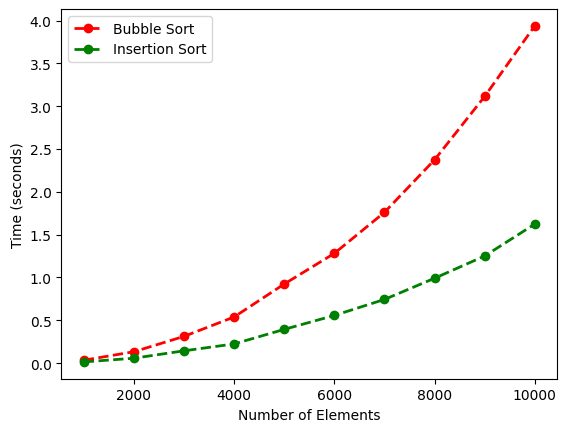

In [5]:
from time import perf_counter
from random import randint
from functools import wraps
from matplotlib import pyplot

def sort_timer(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
        start = perf_counter()
        result = func(*args, **kwargs)
        end = perf_counter()
        return end - start
    return wrapper

@sort_timer
def bubble_sort(a_list):    
  """    
  Sorts a_list in ascending order    
  """    
  for pass_num in range(len(a_list) - 1):        
    for index in range(len(a_list) - 1 - pass_num):            
      if a_list[index] > a_list[index + 1]:                
        temp = a_list[index]                
        a_list[index] = a_list[index + 1]                
        a_list[index + 1] = temp

@sort_timer  
def insertion_sort(a_list):    
  """    
  Sorts a_list in ascending order    
  """    
  for index in range(1, len(a_list)):        
    value = a_list[index]        
    pos = index - 1        
    while pos >= 0 and a_list[pos] > value:            
      a_list[pos + 1] = a_list[pos]            
      pos -= 1        
    a_list[pos + 1] = value

def make_lists_of_sort_times(sort1, sort2, lengths):
    times1 = []
    times2 = []
    for n in lengths:
        lst = [randint(1,10000) for i in range(n)]
        lst2 = list(lst)
        times1.append(sort1(lst))
        times2.append(sort2(lst2))
    return times1, times2
    
def compare_sorts(sort1, sort2):
    lengths = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]
    times1, times2 = make_lists_of_sort_times(sort1, sort2, lengths)
    pyplot.plot(lengths, times1, 'ro--', linewidth=2, label='Bubble Sort')
    pyplot.plot(lengths, times2, 'go--', linewidth=2, label='Insertion Sort')
    pyplot.xlabel("Number of Elements")
    pyplot.ylabel("Time (seconds)")
    pyplot.legend()
    pyplot.show()

compare_sorts(bubble_sort, insertion_sort)

In [1]:
class ChessVar:

    def __init__(self):
        self._board = [[' '] * 8 for _ in range(8)] 
        self._board[0] = ['K', 'B', 'N', ' ', ' ', 'n', 'b', 'k']
        self._board[1] = ['R', 'B', 'N', ' ', ' ', 'n', 'b', 'r']
        self._board[6] = [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' '] 
        self._board[7] = [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
        self._white_to_move = True
        self._game_state = 'UNFINISHED'
        
    def get_game_state(self):
        return self._game_state
    
    def make_move(self, start_sq, end_sq):
        
        # Input validation
        if self._game_state != 'UNFINISHED':
            return False
        
        start_row = 8 - int(start_sq[1])
        start_col = ord(start_sq[0]) - ord('a')
        end_row = 8 - int(end_sq[1])
        end_col = ord(end_sq[0]) - ord('a')
        
        if self._board[start_row][start_col] == ' ':
            return False
        
        if (self._white_to_move and 
               self._board[start_row][start_col].islower()) or \
           (not self._white_to_move and 
                self._board[start_row][start_col].isupper()):
            return False       
        
        # Check if move is valid
        if abs(start_row - end_row) > 1 or abs(start_col - end_col) > 1:
            return False
        
        # Make move
        self._board[end_row][end_col] = self._board[start_row][start_col]
        self._board[start_row][start_col] = ' '
        
        # Update game state if king reached last row
        if self._board[end_row][end_col] == 'K' and end_row == 7:
            self._game_state = 'WHITE_WON'
        elif self._board[end_row][end_col] == 'k' and end_row == 7:
            self._game_state = 'BLACK_WON'
            if self._white_to_move:
                self._game_state = 'TIE'
                
        # Toggle turn
        self._white_to_move = not self._white_to_move
        
        return True
    

game = ChessVar()
move_result = game.make_move('c2', 'e3')
game.make_move('g1', 'f1')
state = game.get_game_state()
print(state)


UNFINISHED


In [2]:
class ChessVar:
    """
    A class for playing an abstract board game that is a variant of chess.
    """

    def __init__(self):
        """
        Initialize the ChessVar game with the starting position and other data members.
        """
        # Initialize the board with the starting position using a 2D list
        self.board = [
            ['.', '.', '.', '.', '.', '.', '.', '.'],
            ['.', '.', '.', '.', '.', '.', '.', '.'],
            ['.', '.', '.', '.', '.', '.', '.', '.'],
            ['.', '.', '.', '.', '.', '.', '.', '.'],
            ['.', '.', '.', '.', '.', '.', '.', '.'],
            ['.', '.', '.', '.', '.', '.', '.', '.'],
            ['R', 'B', 'N', ' ', ' ', 'n', 'b', 'r'],
            ['K', 'B', 'N', ' ', ' ', 'n', 'b', 'k']
        ]

        # Initialize other data members
        self.current_player = 'white'
        self.game_state = 'UNFINISHED'

    def get_game_state(self):
        """
        Get the current state of the game.

        Returns:
            str: The state of the game ('UNFINISHED', 'WHITE_WON', 'BLACK_WON', 'TIE').
        """
        return self.game_state

    def make_move(self, from_square, to_square):
        """
        Make a move on the ChessVar board.

        Args:
            from_square (str): The square from which the piece is moved (e.g., 'a2').
            to_square (str): The destination square for the move (e.g., 'a3').

        Returns:
            bool: True if the move is valid and successful, False otherwise.
        """
        if self.game_state != 'UNFINISHED':
            return False  # Game is already finished

        # Convert algebraic notation to row and column indices
        from_row, from_col = self._algebraic_to_indices(from_square)
        to_row, to_col = self._algebraic_to_indices(to_square)

        # Check if the piece belongs to the current player
        if self.board[from_row][from_col].islower() and self.current_player == 'white':
            return False
        if self.board[from_row][from_col].isupper() and self.current_player == 'black':
            return False

        # Check if the move is legal (you need to implement the rules for legal moves)
        # ...

        # Update the board, game state, and current player
        # ...

        return True

    def _algebraic_to_indices(self, square):
        """
        Convert algebraic notation (e.g., 'a1') to row and column indices.

        Args:
            square (str): The algebraic notation for a square.

        Returns:
            tuple: A tuple containing the row and column indices.
        """
        col = ord(square[0]) - ord('a')
        row = int(square[1]) - 1
        return row, col

    def _indices_to_algebraic(self, row, col):
        """
        Convert row and column indices to algebraic notation.

        Args:
            row (int): The row index.
            col (int): The column index.

        Returns:
            str: The algebraic notation for a square.
        """
        square = chr(col + ord('a')) + str(row + 1)
        return square

# Example usage
if __name__ == "__main__":
    game = ChessVar()
    move_result = game.make_move('c2', 'e3')
    game.make_move('g1', 'f1')
    state = game.get_game_state()
    print(state)

UNFINISHED
